<a href="https://colab.research.google.com/github/lalitha-sahitya/Breast-cancer-detection/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/breast-cancer-classification-uwf-course')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 50.9k/50.9k [00:00<00:00, 27.7MB/s]


Extracting archive ./breast-cancer-classification-uwf-course/breast-cancer-classification-uwf-course.zip to ./breast-cancer-classification-uwf-course


In [4]:
os.listdir('breast-cancer-classification-uwf-course')

['test.csv', 'train.csv', 'sample_submission.csv']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('/content/breast-cancer-classification-uwf-course/train.csv')
data.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   label                    455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [8]:
test_data=pd.read_csv('/content/breast-cancer-classification-uwf-course/test.csv')
test_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,906564,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208
1,85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790
2,891670,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584
3,874217,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938
4,905680,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       114 non-null    int64  
 1   radius_mean              114 non-null    float64
 2   texture_mean             114 non-null    float64
 3   perimeter_mean           114 non-null    float64
 4   area_mean                114 non-null    float64
 5   smoothness_mean          114 non-null    float64
 6   compactness_mean         114 non-null    float64
 7   concavity_mean           114 non-null    float64
 8   concave points_mean      114 non-null    float64
 9   symmetry_mean            114 non-null    float64
 10  fractal_dimension_mean   114 non-null    float64
 11  radius_se                114 non-null    float64
 12  texture_se               114 non-null    float64
 13  perimeter_se             114 non-null    float64
 14  area_se                  1

In [10]:
l={'B':0,'M':1}
data['label']=data['label'].map(l)

In [11]:
data=data.drop('id',axis=1)
test_data=test_data.drop('id',axis=1)

In [12]:
data.head()

,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,0,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,0,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


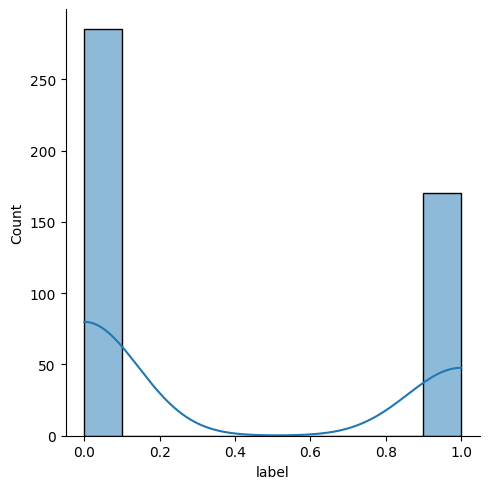

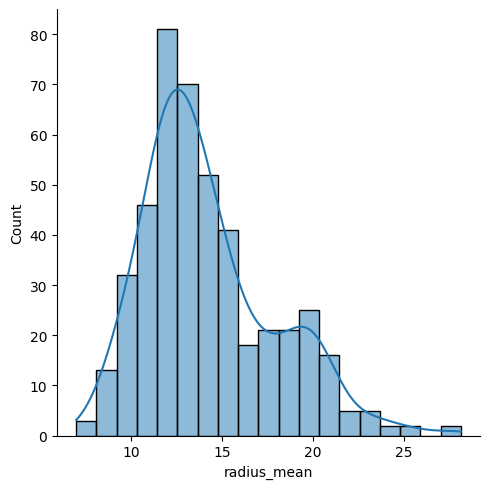

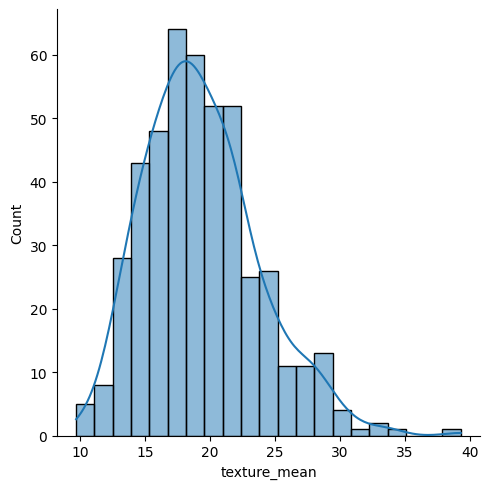

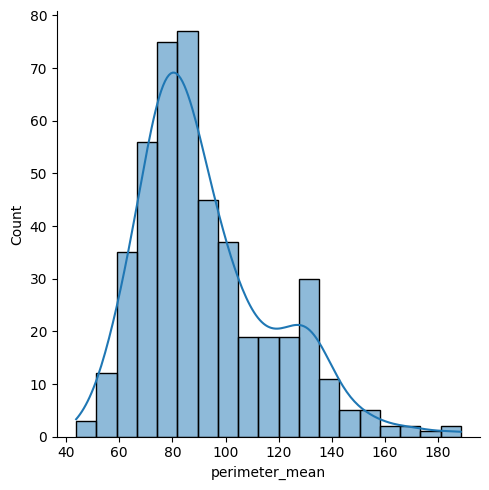

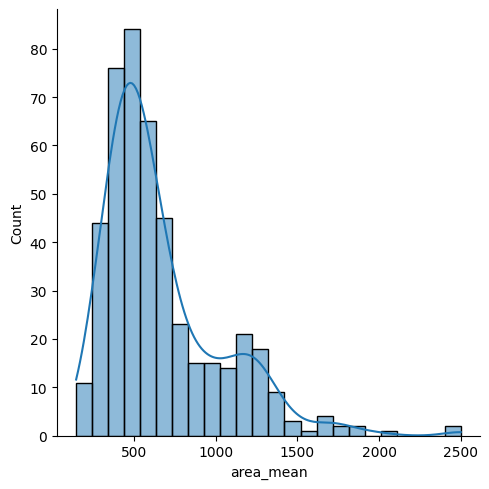

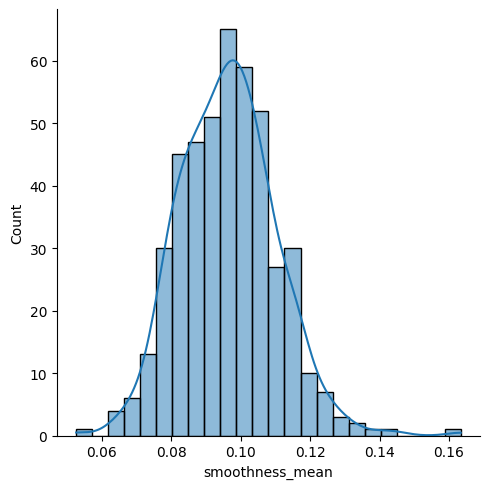

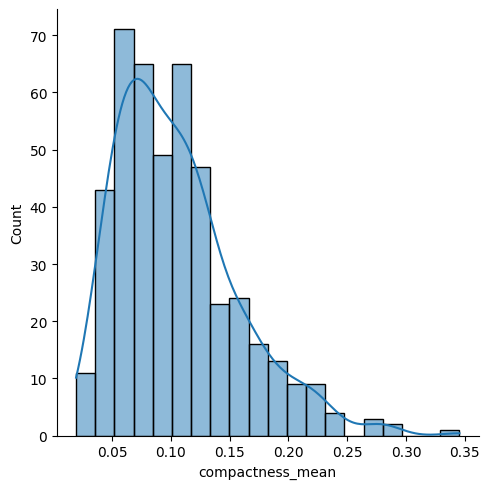

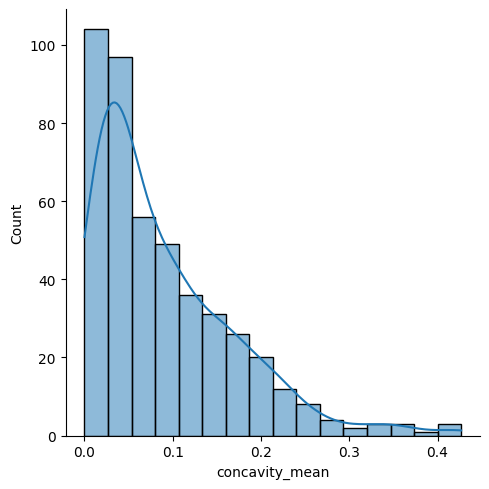

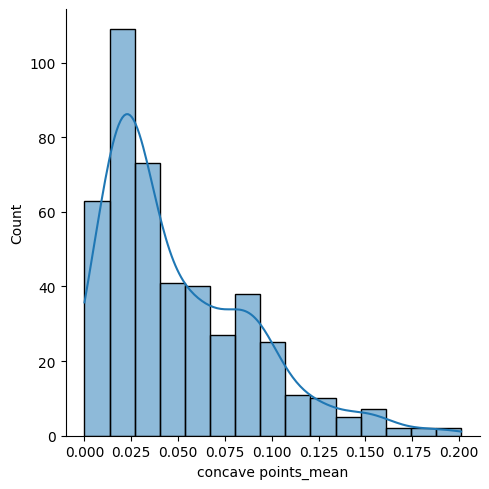

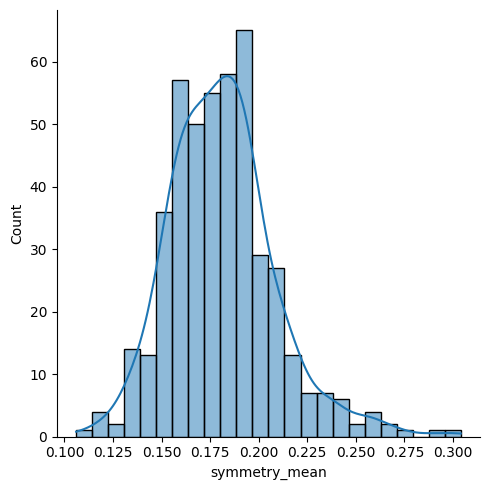

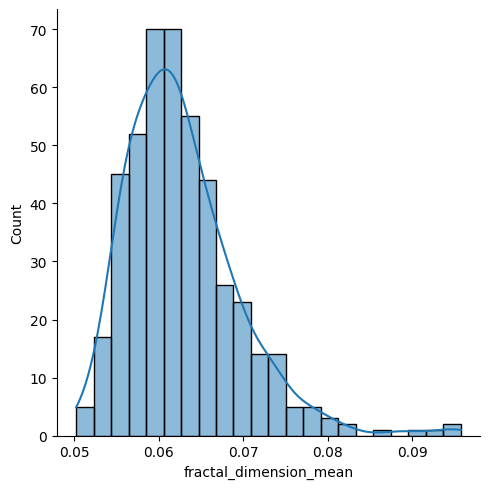

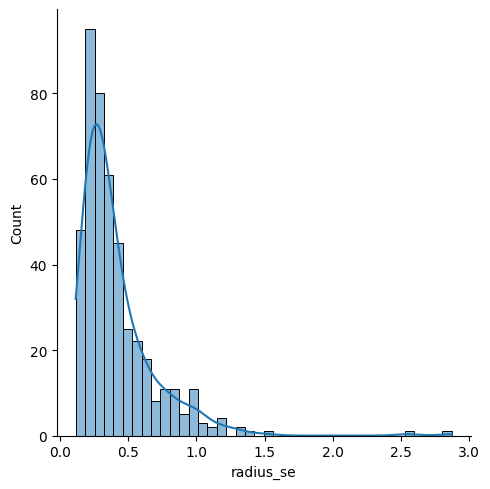

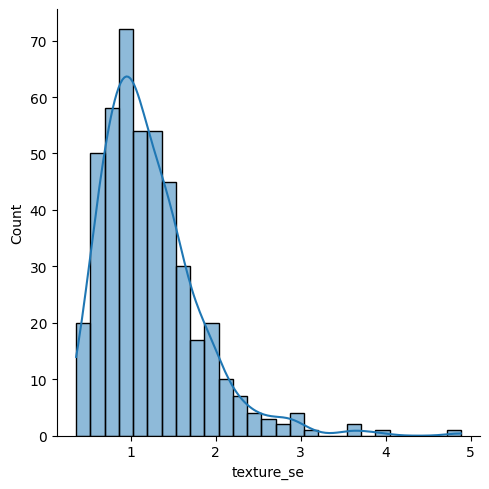

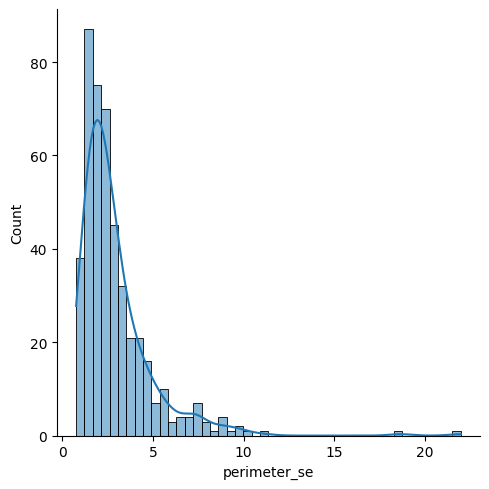

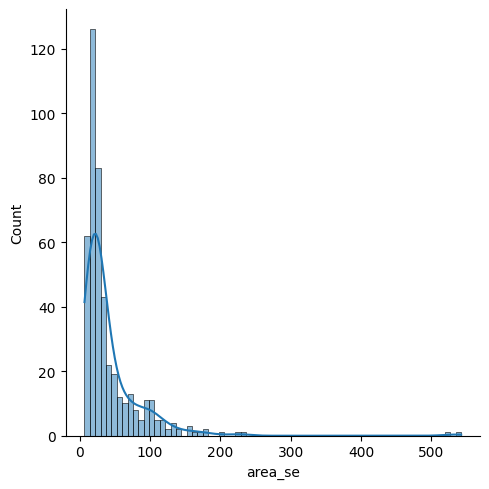

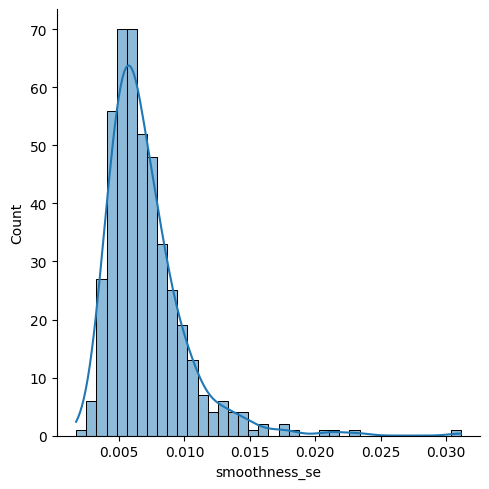

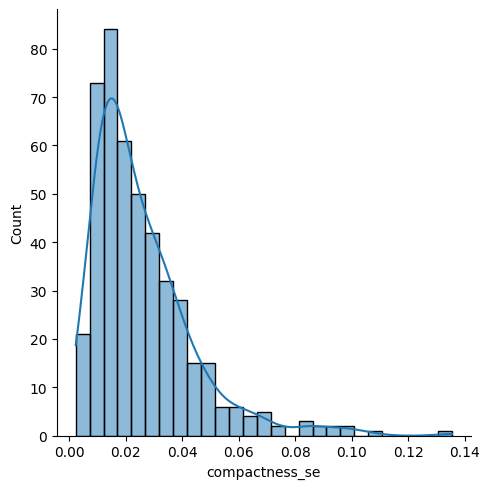

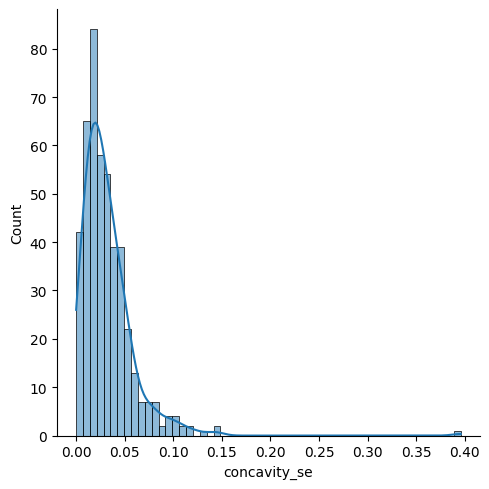

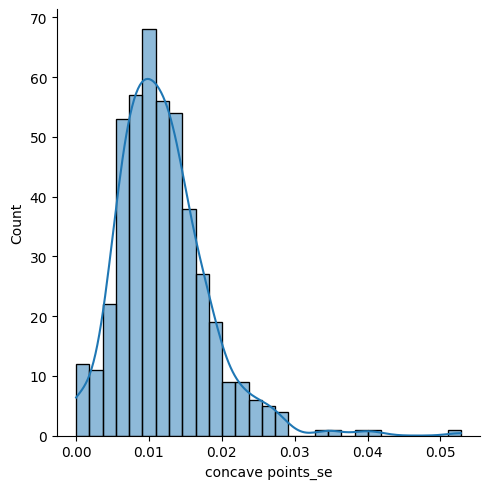

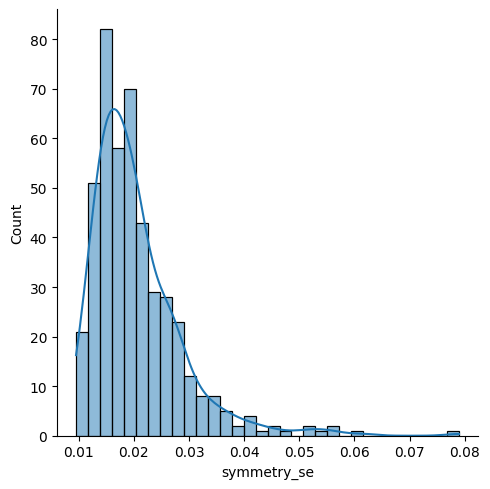

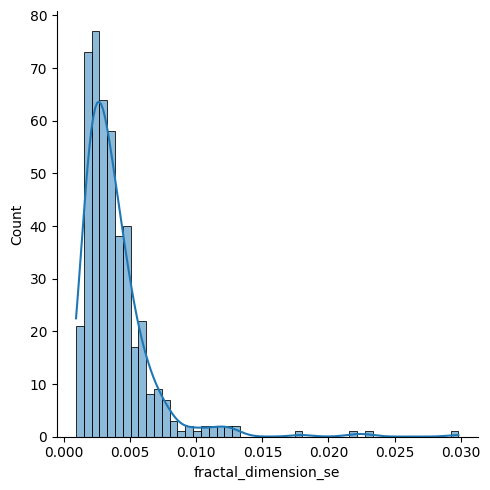

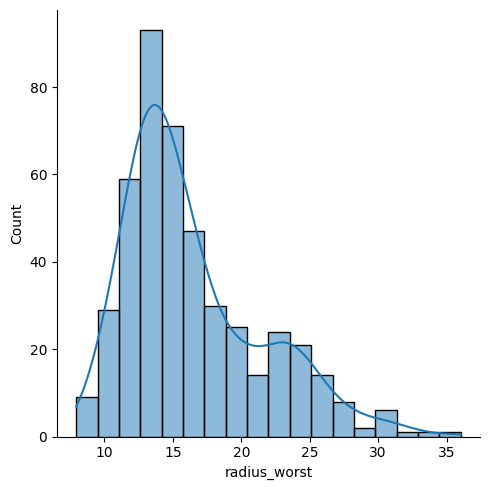

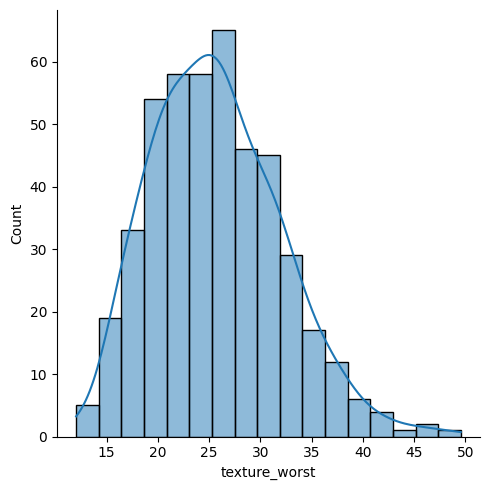

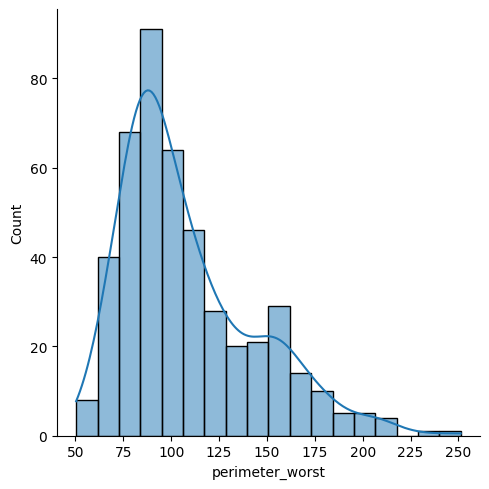

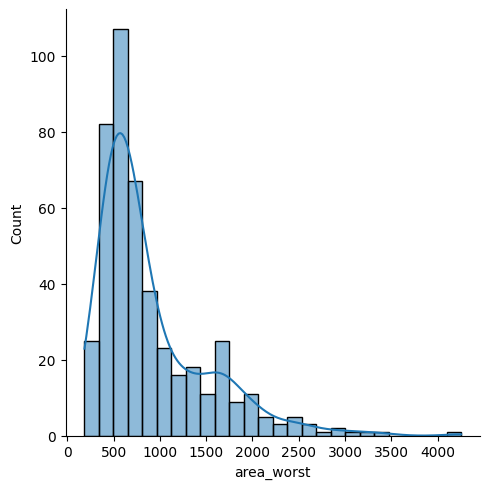

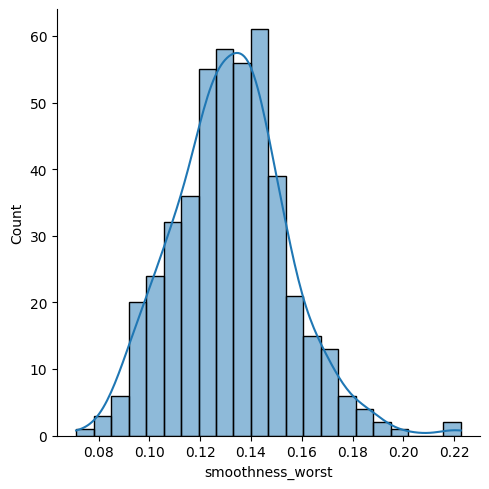

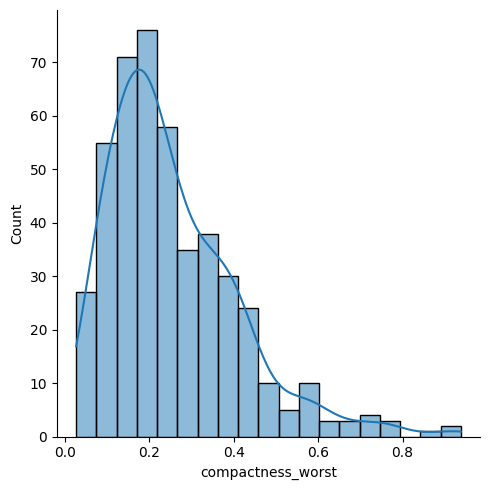

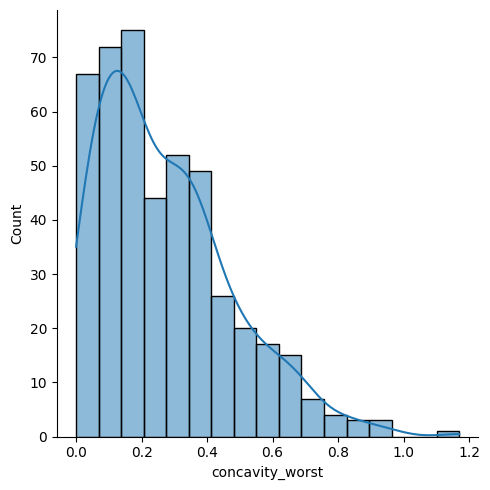

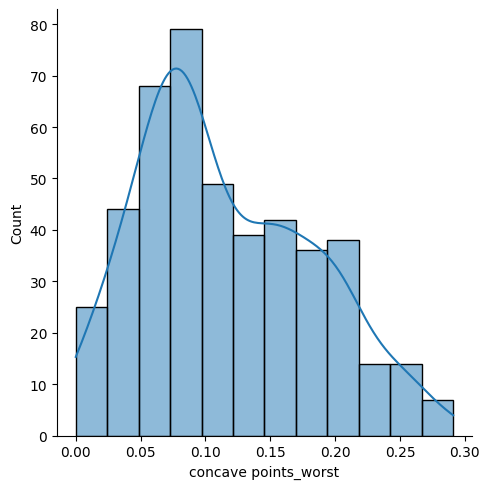

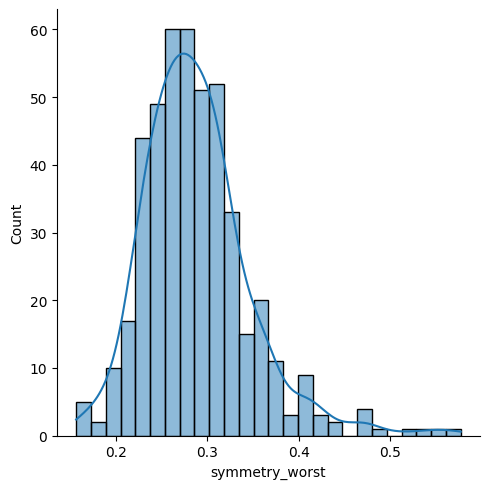

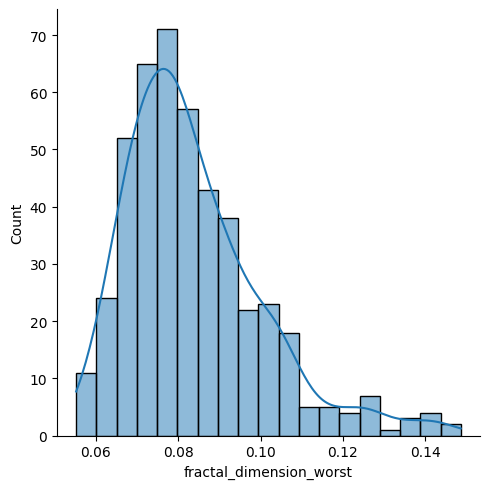

In [13]:
for i in data.columns:
  sns.displot(data[i],kde=True)

In [14]:
x=data.drop('label',axis=1)
y=data['label']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape

(364, 30)

In [17]:
x_test.shape

(91, 30)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
test_data=sc.transform(test_data)

In [19]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)
test_data=pd.DataFrame(test_data,columns=x.columns)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=10),SVC()]

In [26]:
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(accuracy_score(y_test,y_pred))

0.978021978021978
0.967032967032967
0.9120879120879121
1.0
0.989010989010989


In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
preds=model.predict(test_data)

In [39]:
sub=pd.read_csv('/content/breast-cancer-classification-uwf-course/sample_submission.csv')
sub.head()

,id,label
0,906564,M
1,85715,M
2,891670,B
3,874217,M
4,905680,M


In [40]:
preds

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

In [41]:
a=[]

In [42]:
for i in preds:
  if i==0:
    a.append('B')
  else:
    a.append('M')

In [43]:
sub['label']=a

In [44]:
sub.head()

,id,label
0,906564,B
1,85715,M
2,891670,B
3,874217,M
4,905680,M


In [45]:
sub.to_csv('submission.csv',index=False)